In [1]:
import os
import shutil

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pretty_midi
import IPython.display as ipd
import libfmp.c1

from utils.midi import *

In [2]:
midi_note_df = pd.read_csv('./data/midi_to_notes.csv', index_col=0)
midi_note_df

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B
Octave,,,,,,,,,,,,
-2,0,1,2,3,4,5,6,7,8,9,10,11
-1,12,13,14,15,16,17,18,19,20,21,22,23
0,24,25,26,27,28,29,30,31,32,33,34,35
1,36,37,38,39,40,41,42,43,44,45,46,47
2,48,49,50,51,52,53,54,55,56,57,58,59
3,60,61,62,63,64,65,66,67,68,69,70,71
4,72,73,74,75,76,77,78,79,80,81,82,83
5,84,85,86,87,88,89,90,91,92,93,94,95
6,96,97,98,99,100,101,102,103,104,104,106,107


In [3]:
path = './data/theorytab/MIDI/t/the-beatles/yesterday/verse_symbol_key.mid'
midi_data = pretty_midi.PrettyMIDI(path)
df = midi_to_df(midi_data)

In [4]:
midi_data.key_signature_changes

[KeySignature(key_number=5, time=0.0)]

In [ ]:
midi_data

In [7]:
df = add_octave_and_note(df, midi_note_df)

In [4]:
midi_data2 = df_to_midi(df)

In [5]:
midi_data2.instruments

[Instrument(program=0, is_drum=False, name="")]

In [6]:
df2 = midi_to_df(midi_data2)
df2

,Start,End,Pitch,Velocity,Instrument
0,1.092708,1.189583,71,60,
1,1.279167,1.496875,55,44,
2,1.288542,1.793750,71,54,
3,1.463542,1.631250,59,55,
4,1.633333,1.753125,62,52,
...,...,...,...,...,...
7889,965.256250,965.309375,47,76,
7890,965.264583,968.256250,62,76,
7891,965.567708,965.605208,50,73,
7892,965.567708,968.208333,59,68,


# Play audio

In [ ]:
Fs = 22050
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [ ]:
Fs = 22050
audio_data = midi_data2.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [ ]:
score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score, figsize=(16, 9), velocity_alpha=True);

# Check keys of different midi files

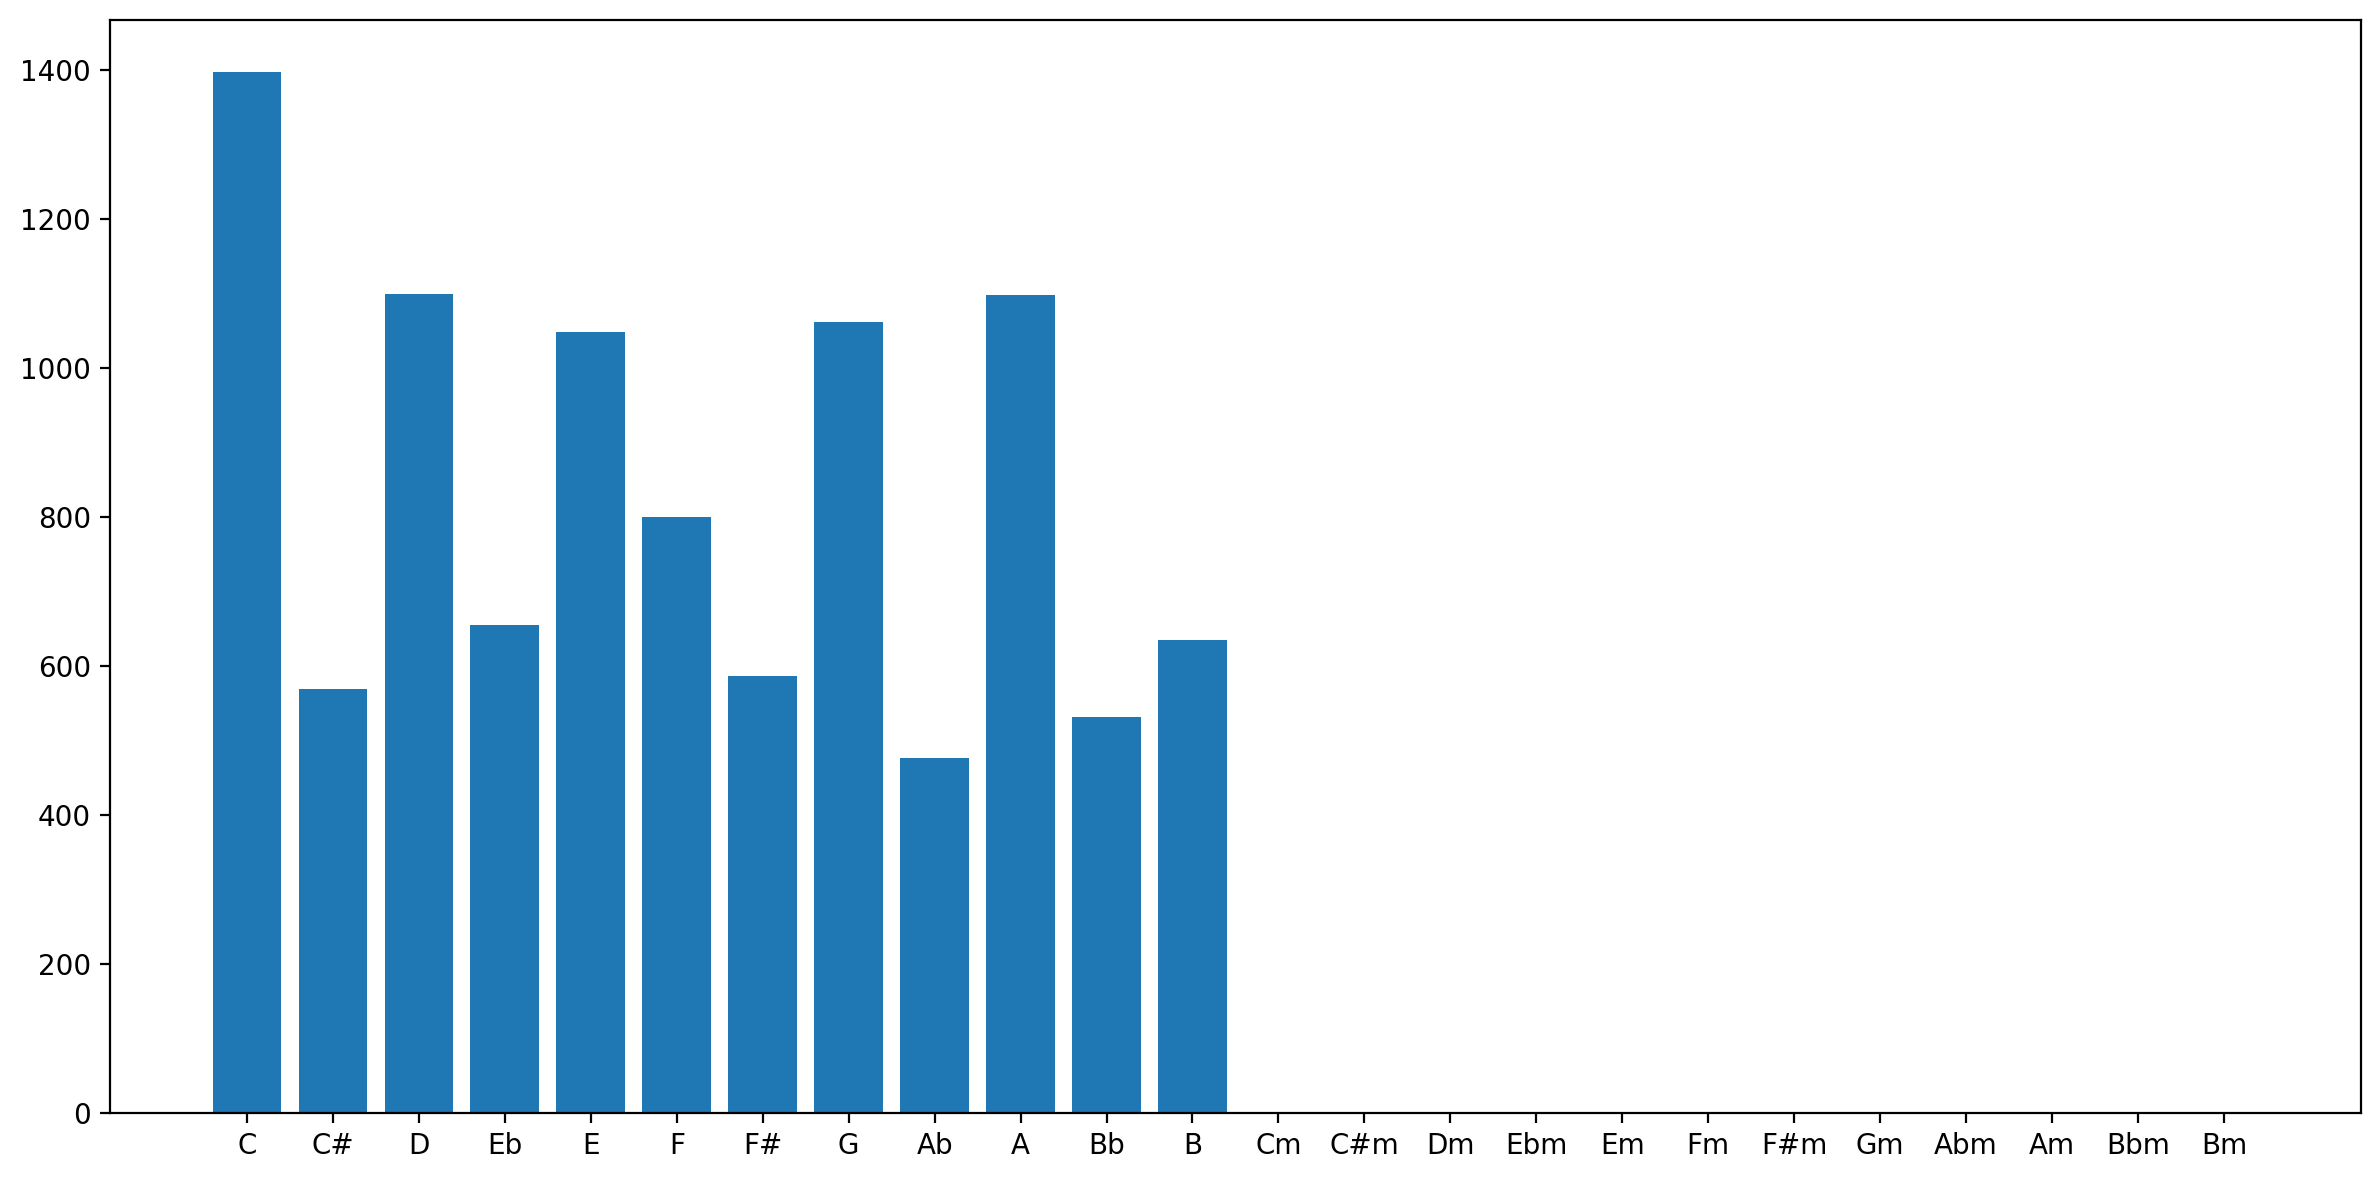

In [156]:
key_counts = np.zeros(24, dtype=int)
get_key_and_sort_files_to_dir('./data/theorytab/MIDI/', key_counts)
fig = plt.figure(figsize=(12, 6))
plt.bar(x=[get_key_note(i, tight=True) for i in range(24)], height=key_counts)
plt.tight_layout()

# Change all single key songs to key of C Major

In [ ]:
remove_empty('./data/single_key/')

In [27]:
def change_key(directory: str, n_midi_files: int=0):
    if n_midi_files > 0: # multiple midi files for same song
        pitches = []
        notes = []
        for entry in os.scandir(directory):
            if entry.is_file() and entry.name.endswith('.mid'):
                midi_data = pretty_midi.PrettyMIDI(entry.path)
                # key_signature = midi_data.key_signature_changes
                df = midi_to_df(midi_data)
                unique_pitches = np.unique(df['Pitch'].values)
                pitches += list(unique_pitches)
                notes += [pretty_midi.note_number_to_name(p) for p in unique_pitches]
        pitches = set(pitches)
        notes = set(notes)
        print(f'{directory}: {notes}')
    else:
        for entry in os.scandir(directory):
            if entry.is_dir():
                n_midi_files = len([name for name in os.listdir(entry.path) if name.endswith('.mid')])
                change_key(entry.path, n_midi_files)

In [32]:
change_key('./data/single_key/4/')

./data/single_key/4/i/imagine-dragons/warriors: {'G3', 'B4', 'A3', 'E4', 'E3', 'D#4', 'D#3', 'G4', 'F#3', 'B3', 'F#4', 'A4'}
./data/single_key/4/i/iggy-azalea/team: {'B4', 'E4', 'G4', 'F#4', 'A4'}
./data/single_key/4/i/imposs-ft-j-perry/youre-on-my-mind: {'B4', 'E4', 'G#4', 'C#4', 'B3', 'F#4', 'A4'}
./data/single_key/4/i/iron-maiden/blood-brothers: {'B4', 'D5', 'G5', 'E4', 'G4', 'F#5', 'F#4', 'A4', 'C5', 'E5'}
./data/single_key/4/i/iron-maiden/the-wicker-man: {'B4', 'E4', 'G4', 'F#4', 'A4', 'D4'}
./data/single_key/4/i/interpol/narc: {'B4', 'E4', 'B3', 'F#4', 'A4', 'D4'}
./data/single_key/4/i/ides-of-march/vehicle: {'B4', 'D5', 'G5', 'E4', 'G4', 'F#5', 'A4', 'E5'}
./data/single_key/4/i/infected-mushroom/fields-of-grey---au5-remix: {'A3', 'E4', 'G4', 'B3', 'F#4', 'A#3', 'D4'}
./data/single_key/4/i/infected-mushroom/heavyweight: {'B5', 'E4', 'G4', 'F4', 'B3', 'A4', 'A#4', 'B4', 'D5', 'G5', 'F5', 'G3', 'E6', 'A3', 'F#5', 'D4', 'E5', 'C4', 'F#4', 'C5'}
./data/single_key/4/q/qubicon-and-reun

In [24]:
path = './data/theorytab/MIDI/p/prince/purple-rain/verse_symbol_key.mid'
midi_data = pretty_midi.PrettyMIDI(path)
df = midi_to_df(midi_data)
df

,Start,End,Pitch,Velocity,Instrument
